## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flights_samp.csv')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
df.dep_delay

0       -6.0
1       -1.0
2        6.0
3       -3.0
4       16.0
        ... 
4995    -1.0
4996   -10.0
4997    -6.0
4998    -6.0
4999    12.0
Name: dep_delay, Length: 5000, dtype: float64

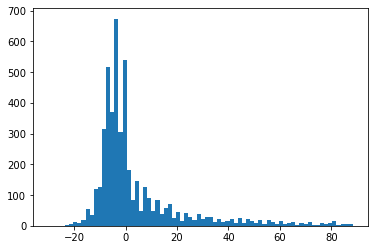

In [18]:
plt.hist(df.dep_delay, bins=np.arange(-30,90, 1.6));

In [3]:
col_index_drop = df.isnull().sum() / df.shape[0] > 0.5
col_to_drop = np.append(df.columns[col_index_drop], ['index', 'dup', 'tail_num', 'crs_elapsed_time'])

In [4]:
col_to_drop

array(['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name', 'index', 'dup',
       'tail_num', 'crs_elapsed_time'], dtype=object)

In [5]:
df = df.drop(columns=col_to_drop, axis=1)

In [6]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'diverted', 'actual_elapsed_time',
       'air_time', 'flights', 'distance'],
      dtype='object')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [3]:
hhmm = []
crs_hm = df.crs_dep_time.astype('str')
for t in crs_hm:
    if len(t) == 1:
        hhmm.append('0' + t + ':00:00')
    elif (len(t) == 2) & (t < '24'):
        hhmm.append(t + ':00:00')
    elif (len(t) == 2) & (t > '24'):
        hhmm.append('00:' + t + ':00')
    elif len(t) == 3:
        hhmm.append('0' + t[0] + ':' + t[1:] + ':00')
    else:
        hhmm.append(t[:2] + ':' + t[2:] + ":00")

In [4]:
df['crs_dep_time_hhmm'] = hhmm

In [5]:
df['crs_dep_time_hhmm']

0       00:59:00
1       21:35:00
2       16:40:00
3       10:15:00
4       18:25:00
          ...   
4995    11:00:00
4996    07:20:00
4997    16:46:00
4998    19:29:00
4999    04:00:00
Name: crs_dep_time_hhmm, Length: 5000, dtype: object

In [6]:
data_sub = df[['crs_dep_time_hhmm', 'origin_city_name', 'fl_date']].copy()

In [7]:
data_sub.loc[:, 'origin_city_name'] = data_sub.loc[:, 'origin_city_name'].str.replace(' ', '')

In [8]:
data_sub.head()

,crs_dep_time_hhmm,origin_city_name,fl_date
0,00:59:00,"LosAngeles,CA",2019-01-07
1,21:35:00,"Chicago,IL",2019-01-04
2,16:40:00,"Omaha,NE",2018-12-29
3,10:15:00,"Tampa,FL",2019-01-01
4,18:25:00,"Newark,NJ",2019-01-02


In [26]:
data_temp = data_sub.sample(30)

In [11]:
import requests
import config as cfg
unit_group="us"
api_key = cfg.visual_crossing['config/api_key']
requestUrl = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline'

In [28]:
weather_dict = {
    'conditions':[]
}
count = 1
for row in data_temp.values:
    print('Query Count: ', count)
    time = row[0]
    loc = row[1]
    date = row[2]
    url = requestUrl + '/' + loc + '/' + date + 'T' + time + '?key=' + api_key      
    res = requests.get(url)
    if res.status_code == 200:
        weather_json = res.json()
        try:
            condition = weather_json['days'][0]['conditions']
        except:
            condition = 'NA'
        else:        
            weather_dict['conditions'].append(condition)
    else:
        print('Error: ', res.status_code)        
    count += 1

Query Count:  1
Query Count:  2
Query Count:  3
Query Count:  4
Query Count:  5
Query Count:  6
Query Count:  7
Query Count:  8
Query Count:  9
Query Count:  10
Query Count:  11
Query Count:  12
Query Count:  13
Query Count:  14
Query Count:  15
Query Count:  16
Query Count:  17
Query Count:  18
Query Count:  19
Query Count:  20
Query Count:  21
Query Count:  22
Query Count:  23
Query Count:  24
Query Count:  25
Query Count:  26
Query Count:  27
Query Count:  28
Query Count:  29
Query Count:  30


In [29]:
weather_dict

{'conditions': ['NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA',
  'NA']}

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [4]:
def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
df = split_time_of_day_departure(df)

def split_time_of_day_arrival(df):
    """ takes estimated time of arrival and splits in to hours 24 hour clock (local time) """
    df['arr_hour'] = df['crs_arr_time']
    df['arr_hour'] = np.floor(df['arr_hour']/100).astype("int")
    return df
df = split_time_of_day_arrival(df)



#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [2]:
# df.columns

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
  
def create_haul_type(df):
    """ adds short:0, mid:1, long:2 range haul types from crs_elapsed_time (scheduled) """

    df["haul_type"] = df['crs_elapsed_time']
    df["haul_type"].mask(df["haul_type"].values < 180, 0, inplace=True)
    df["haul_type"].mask((df["haul_type"] > 180) & (df["haul_type"] < 360), 1, inplace=True)
    df["haul_type"].mask((df["haul_type"] > 360), 2, inplace=True) 
    return df  

df = split_time_of_day_departure(df)
df = create_haul_type(df)




#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?